# Session 4 - Higher-order centralities and clustering

**Ingo Scholtes**  
Chair of Machine Learning for Complex Networks  
Center for Artificial Intelligence and Data Science (CAIDAS)  
Julius-Maximilians-Universität Würzburg, DE  


**June 13 2022**

### Ranking nodes in higher-order networks

Higher-order models capture deviations from the transitivity assumption that we often implicitly make when we apply standard graph mining or network analysis techniques. An important class of methods that rely on this assumption are centrality measures, which are often used to rank nodes in networked systems. To demonstrate this, we use the toy example from the previous session:

In [29]:
import pathpy as pp

toy_paths = pp.Paths.read_file('../data/toy_paths.ngram')
print(toy_paths)

2022-06-13 13:43:15 [Severity.INFO]	Reading ngram data ... 
2022-06-13 13:43:15 [Severity.INFO]	finished. Read 2 paths with maximum length 2
2022-06-13 13:43:15 [Severity.INFO]	Calculating sub path statistics ... 
2022-06-13 13:43:15 [Severity.INFO]	finished.
Total path count: 		20.0 
[Unique / Sub paths / Total]: 	[2.0 / 100.0 / 120.0]
Nodes:				5 
Edges:				4
Max. path length:		2
Avg path length:		2.0 
Paths of length k = 0		0.0 [ 0.0 / 60.0 / 60.0 ]
Paths of length k = 1		0.0 [ 0.0 / 40.0 / 40.0 ]
Paths of length k = 2		20.0 [ 2.0 / 0.0 / 20.0 ]



In [30]:
style = { 'label_offset': [0,-1], 'label_color' : 'black', 'width': 800, 'height': 250}

hon_1 = pp.HigherOrderNetwork(toy_paths, k=1)
pp.visualisation.plot(hon_1, **style)

In [31]:
hon_2 = pp.HigherOrderNetwork(toy_paths, k=2)
pp.visualisation.plot(hon_2, **style)

In [32]:
hon_2_null = pp.HigherOrderNetwork(toy_paths, k=2, null_model=True)
pp.visualisation.plot(hon_2_null, **style)

Let us consider the betweenness value of a node $v$, which (in its unnormalized variant) captures for how many pairs of nodes $x,y$ the shortest path from $x$ to $y$ passes through $v$. This measure is important, because is teaches us something about the role of nodes in information flow. It further captures to what extent removing a node will affect the shortest paths between other nodes. Let us try this in our example:

<span style="color:red">**TODO:** Use the method `pp.algorithms.centralities.betweenness` to calculate the betweenness of node `c` in the first-order network model of `toy_paths`.</span>

In [33]:
print(pp.algorithms.centralities.betweenness(hon_1)['c'])

2022-06-13 13:43:29 [Severity.INFO]	Calculating betweenness (order k = 1) ...
2022-06-13 13:43:29 [Severity.INFO]	finished.
4.0


This is easy to understand, as there are four pairs $(b,e)$, $(b,d)$, $(a,e)$, $(a,d)$ for which the shortest path in the topology passes through node $c$. However, this notion of *importance* of node $c$ is based on the assumption that paths are transitive and Markovian, which is not the case in our observed paths. `pathpy` actually allows us to calculate the betweenness of node $c$ in the observed paths `toy_paths`.

<span style="color:red">**TODO:** Use the method `pp.algorithms.centralities.betweenness` to calculate the betweenness of node `c` in the paths observed in `toy_paths`.</span>

In [34]:
print(pp.algorithms.centralities.betweenness(toy_paths)['c'])

2022-06-13 13:43:49 [Severity.INFO]	Calculating betweenness in paths ...
2022-06-13 13:43:49 [Severity.INFO]	finished.
2.0


Not surprisingly, the betweenness of node $c$ in the actual paths is two, as $c$ only connects two pairs of nodes are connected via a (shortest) path. This change in centrality is captured in the higher-order model and `pathpy` allows us to directly generalize centrality measures to higher orders, simply by calling the functions on the class `HigherOrderNetwork`.

<span style="color:red">**TODO:** Use the method `pp.algorithms.centralities.betweenness` to calculate the betweenness of node `c` in a second-order model for `toy_paths`.</span>

In [35]:
print(pp.algorithms.centralities.betweenness(hon_2)['c'])

2022-06-13 13:43:55 [Severity.INFO]	Calculating betweenness (order k = 2) ...
2022-06-13 13:43:55 [Severity.INFO]	finished.
2.0


We see that in this example (since we **only** have second-order dependencies) the second-order model accurately captures the betweenness of node $c$. Let us contrast this to the second-order null model.

<span style="color:red">**TODO:** Use the method `pp.algorithms.centralities.betweenness` to calculate the betweenness of node `c` in the second-order null model for `toy_paths`.</span>

In [36]:
print(pp.algorithms.centralities.betweenness(hon_2_null)['c'])

2022-06-13 13:44:01 [Severity.INFO]	Calculating betweenness (order k = 2) ...
2022-06-13 13:44:01 [Severity.INFO]	finished.
4.0


This is what we expect, since this null model is simply a second-order representation of the first-order model, in which paths are transitive and memoryless.


## Predicting node rankings with higher-order models

Let us now explore how we can apply higher-order models in practical prediction tasks. Assume we are given the task to rank nodes in a network according to how often they are traversed by paths. This has practical applications, e.g. predicting the most frequently clicked Web pages based on the topology of the link graph, or predicting the most congested airports based on the topology of flight connections. Let us study the latter example based on a data set on the paths of airline passengers in the United Stated.

For your convenience, we have partitioned the data set into a training and a validation set of equal size. Our goal will be to use the training set to learn (higher-order) network models. We then calculate a higher-order generalisation of `pagerank` described [in this paper](http://dl.acm.org/citation.cfm?id=3098145) in these models to predict the ranking of airports according to the number of passengers in the validation set.

<span style="color:red">**TODO:** Use the `Paths.read_file` function to read path statistics from the ngram data file `US_flights_train.ngram`. Set the parameter `frequency` of the read_file function to `False`. Generate a first-, second-, and third-order model for the paths. Use `pp.algorithms.centralities.pagerank` to calculate the PageRank of nodes in the higher-order models.</span>

In [37]:
training_paths = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)

hon_1 = pp.HigherOrderNetwork(training_paths, k=1)
hon_2 = pp.HigherOrderNetwork(training_paths, k=2)
hon_3 = pp.HigherOrderNetwork(training_paths, k=3)

pr_1 = pp.algorithms.centralities.pagerank(hon_1)
pr_2 = pp.algorithms.centralities.pagerank(hon_2)
pr_3 = pp.algorithms.centralities.pagerank(hon_3)

# with this, we generate 
pr_1 = [pr_1[v] for v in training_paths.nodes]
pr_2 = [pr_2[v] for v in training_paths.nodes]
pr_3 = [pr_3[v] for v in training_paths.nodes]

2022-06-13 13:44:09 [Severity.INFO]	Reading ngram data ... 
2022-06-13 13:44:10 [Severity.INFO]	finished. Read 143405 paths with maximum length 13
2022-06-13 13:44:10 [Severity.INFO]	Calculating sub path statistics ... 
2022-06-13 13:44:10 [Severity.INFO]	finished.


We can now use the values as a prediction for the ranking of airports based on a first-, second-, and third-order model for passenger itineraries. To validate the prediction performance of these models, we need a **ground truth**. We can calculate this in the validation data set. Specifically, we are interested in a ranking of airports in terms of the passenger itineraries passing through any given airport. 

<span style="color:red">**TODO:** Use the `Paths.read_file` function to read path statistics from the ngram data file `US_flights_validate.ngram`. Set the parameter `frequency` of the read_file function to `False`. Use the method `pp.algorithms.centralities.node_traversals` to calculate the number of passengers that through each airport in the validation data set.</span>

In [38]:
validate_paths = pp.Paths.read_file('../data/US_flights_validate.ngram', frequency=False)

traversals = pp.algorithms.centralities.node_traversals(validate_paths)
rank_true = [traversals[v] for v in training_paths.nodes]

2022-06-13 13:44:23 [Severity.INFO]	Reading ngram data ... 
2022-06-13 13:44:24 [Severity.INFO]	finished. Read 143405 paths with maximum length 10
2022-06-13 13:44:24 [Severity.INFO]	Calculating sub path statistics ... 
2022-06-13 13:44:24 [Severity.INFO]	finished.
2022-06-13 13:44:24 [Severity.INFO]	Calculating node traversals...
2022-06-13 13:44:24 [Severity.INFO]	finished.


We can validate our models by calculating the Kendall-Tau rank correlations between the ground-truth ranking of airports, and the rankings that we obtain based on the different higher-order models.

<span style="color:red">**TODO:** Use the function `kendalltau` from the package `scipy.stats` to calculate the rank correlation between (i) the ground truth ranking in the validation data, and (ii) the rankings obtained based on the first-, second-, and third-order models respectively.</span>

In [39]:
from scipy.stats import kendalltau

print('tau(pr_1, traversals) = {0}'.format(kendalltau(pr_1, rank_true).correlation))
print('tau(pr_2, traversals) = {0}'.format(kendalltau(pr_2, rank_true).correlation))
print('tau(pr_3, traversals) = {0}'.format(kendalltau(pr_3, rank_true).correlation))

tau(pr_1, traversals) = 0.7765415880849217
tau(pr_2, traversals) = 0.8724501645117442
tau(pr_3, traversals) = 0.8751149821774835


We make three observations: 

1. The first-order topology of flight routes alone allows us to generate a fairly good ranking of airports.
2. We can considerably increase the prediction performance of our model by taking into account second-order dependencies in the observed path statistics. This confirms that higher-order models are useful to improve predictions in real-world systems.
3. Interestingly, moving to the third-order model does not translate to a further increase of prediction performance. This suggests that the data set does not contain strong third-order dependencies. 


Considering that in reality we often do not have ground-truth that allows us to test which order performs best, this highlights the problem that we must decide which order to use for a given data set. We will solve this riddle in session 2, when we introduce a method to learn the optimal order for a given data set. 

### Higher-order clustering and visualisation of causal structures in temporal networks

An interesting application of higher-order models concerns the visualisation of time-aggregated representations of temporal networks. We demonstrate this in a temporal network synthetically generated to exhibit a specific pattern in the ordering of time-stamped edges. Let us load this example and visualise the first 250 time stamps: 

<span style="color:red">**TODO:** Read the file `temporal_clusters.tedges` as a `TemporalNetwork`. Use the `pp.visualisations.plot()` method to visualise the temporal network. Use the parameter `max_time` to limit the visualisation to the first 250 time stamps.</span>

In [41]:
t = pp.TemporalNetwork.read_file('../data/temporal_clusters.tedges')
style = {
    'max_time': 250,
    'ms_per_frame': 10,
    'ts_per_frame': 1
}
pp.visualisation.plot(t, **style)

2022-06-13 13:45:25 [Severity.INFO]	Reading directed time-stamped links ...
2022-06-13 13:45:25 [Severity.INFO]	Building index data structures ...
2022-06-13 13:45:25 [Severity.INFO]	Sorting time stamps ...
2022-06-13 13:45:25 [Severity.INFO]	finished.
2022-06-13 13:45:25 [Severity.INFO]	Starting filtering ...
2022-06-13 13:45:25 [Severity.INFO]	finished. Filtered out 59749 time-stamped edges.
2022-06-13 13:45:25 [Severity.INFO]	Building index data structures ...
2022-06-13 13:45:25 [Severity.INFO]	Sorting time stamps ...
2022-06-13 13:45:25 [Severity.INFO]	finished.


What you probably cannot see in this visualisation is that this temporal network exhibits **clusters in the causal topology**, i.e. there are more **causal paths** between certain clusters of nodes than we would expect if links were independent (and paths were Markovian). We can get a vague idea of this by simulating a random walk in the temporal network, following the trajectory of a walker as it is moved through the nodes by dynamic edges.

<span style="color:red">**TODO:** Use the method `pp.algorithms.temporal_walk.generate_walk` to create a sequence of 500 random walk steps in the temporal network `t`. Use the method `pp.visualisation.plot_walk` to visualise the random walk trajectory in the (first-order) time-aggregated network.</span>

In [42]:
walk = pp.algorithms.temporal_walk.generate_walk(t, 500)
style['ms_per_frame'] = 250
clusters = { str(v): 'red' if len(str(v))<2 else ('green' if str(v).startswith('1') else 'blue') for v in range(30)}
style['node_color'] = clusters
pp.visualisation.plot_walk(pp.Network.from_temporal_network(t), walk, **style)

2022-06-13 13:45:29 [Severity.WARNING]	The temporal_walk.generate_walk function is deprecated.              Please use random_walk.generate_walk instead.


Still, the pattern is difficult to see as the layout of nodes does not reflect the causal structures in the temporal network. With `pathpy` we can easily get around this problem. We can generate a **time-aware layout** that considers the causal topology of the temporal network that results from higher-order dependencies between time-stamped edges. The details of how to calculate higher-order layouts for temporal networks is described in this paper:

V Perri, I Scholtes: [HOTVis: Higher-Order Time-Aware Visualisation of Dynamic Graphs](https://arxiv.org/abs/1908.05976), Graph Drawing 2020

Generating such a time-aware layout in `pathpy` is easy. We simply plot a `HigherOrderNetwork` model for the causal path in a temporal network, while setting a parameter `plot_higher_order_nodes` to False. Different from the previous visualisations, this will project the higher-order topology on the first-order nodes. Let us try this.

<span style="color:red">**TODO:** Generate a second-order model for causal paths in `t` assuming $\delta=1$. Use the `pp.visualisations.plot()` method to visualise the second-order model. Set the `plot_higher_order_nodes` parameter to `False`.</span>

In [44]:
p = pp.path_extraction.paths_from_temporal_network_dag(t)
hon_2 = pp.HigherOrderNetwork(p, k=2)

pp.visualisation.plot(hon_2, plot_higher_order_nodes=False, node_color = clusters)

2022-06-13 13:45:46 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 13:45:47 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		89042
Roots:		29042
Leaves:		29042
Links:		60000
Acyclic:	None

2022-06-13 13:45:47 [Severity.INFO]	Generating causal trees for 29042 root nodes ...
2022-06-13 13:45:49 [Severity.INFO]	finished.


We see that nodes automatically position themselves in groups that correspond to the natural cluster structure in the causal topology. In the visualisation above, we have additionally colored nodes based to their (synthetically generated) ground-truth clusters. With this layout of the graph, let us visualise again our random walk trajectory from above.

<span style="color:red">**TODO:** Visualise the random walk trajectory in the network layouted according to the second-order model.</span>

In [46]:
pp.visualisation.plot_walk(hon_2, walk, **style, plot_higher_order_nodes=False)

We now see that the random walker indeed has a tendency to visit, in subsequent steps, nodes that belong to the same clusters. In this specific case, the cluster pattern in the layout actually disappears if we calculate a third-order layout.

<span style="color:red">**TODO:** Generate a third-order model for the causal topology of the temporal network. Visualise the third-order model like above, again setting the `plot_higher_order_nodes` parameter to `False`.</span>

In [47]:
hon_3 = pp.HigherOrderNetwork(p, k=3)
pp.visualisation.plot(hon_3, plot_higher_order_nodes=False, node_color = clusters)

The reason for this is simple: This example exhibits correlations at correlation length two (i.e. for paths of length two), but there are no correlations at correlation length three. This highlights two important issues, that we will address in a moment:

1. We need a method to determine the optimal order of the higher-order models that we use to analyse (or visualise) a given data set.
2. As real systems are likely to exhibit multiple correlation length simultaneously, we need models that can combine multiple higher-order models.

But before move to these questions, let us spend some words on higher-order clustering in temporal networks. We have seen that correlations in the ordering of time-stamped edges can change the trajectory of a random walker. In particular, we observe clusters in the **causal structure** of a system that make the random walk subsequently visit nodes within the same cluster with higher probability.

Here we briefly introduce a generalisation of **spectral graph clustering algorithms** to higher-order network models. These algorithms utilise [graph Laplacians](https://en.wikipedia.org/wiki/Laplacian_matrix), a matrix representation of a graph where edges are represented by -1 entries, while the diagonal contains the degrees of nodes (and other entries are zero). The eigenvalues and eigenvectors of this matrix provide interesting insights about the topology of a graph, and about its influence on dynamical processes like random walks or diffusion. In particular, the second-smallest eigenvalue of the Laplacian matrix captures how **well-connected** a graph is, where small values close to zero indicate small cuts that can signify cluster structures. Moreover, the corresponding eigenvector, the so-called [Fiedler vector](https://en.wikipedia.org/wiki/Algebraic_connectivity#Partitioning_a_graph_using_the_Fiedler_vector) can be used for a simple spectral clustering algorithm, where nodes in different clusters are represented by eigenvector entries falling to different value ranges.

An interesting prospect for higher-order network analytics is that we can generalise graph Laplacians to higher-order network models, which can then be used to study cluster structures in the causal topology of a temporal network. If you are interested in the mathematical details, check: 

I Scholtes, N Wider, R Pfitzner, A Garas, CJ Tessone, F Schweitzer: [Causality-driven slow-down and speed-up of diffusion in non-Markovian temporal networks](http://www.nature.com/ncomms/2014/140924/ncomms6024/full/ncomms6024.html), Nature Communications, Vol. 5, Article 5024, 2014

Let us try this in our synthetic data set:

<span style="color:red">**TODO:** Use the methods in `pp.algorithms.spectral` to calculate the algebraic connectivity of the second-order model for causal  paths in the temporal network `t`. Compare the value to the the algebraic connectivity of (i) the corresponding second-order null model, and (ii) a first-order model of paths.</span>

In [49]:
print('Second-order model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(hon_2)))

print('Second-order null model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(pp.HigherOrderNetwork(p, k=2, null_model=True))))
print('First-order model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(pp.HigherOrderNetwork(p, k=1))))

2022-06-13 13:48:42 [Severity.INFO]	Calculating algebraic connectivity ... 
2022-06-13 13:48:42 [Severity.INFO]	finished.
Second-order model: 0.051639993731413494
2022-06-13 13:48:43 [Severity.INFO]	Calculating algebraic connectivity ... 
2022-06-13 13:48:43 [Severity.INFO]	finished.
Second-order null model: 0.7890567809471662
2022-06-13 13:48:43 [Severity.INFO]	Calculating algebraic connectivity ... 
2022-06-13 13:48:43 [Severity.INFO]	finished.
First-order model: 0.7890567809471664


We clearly see that the algebraic connectivity of the second-order model is close to zero, thus indicating cluster structures that lead to a small cut in the causal topology of the system. This small value actually captures the "trapping" of the random walker within clusters. The algebraic connectivity of the second-order null model and the first-order model are actually identical (up to numerical imprecision).

Let us now go one step further and use the distribution of Fiedler vector entries to reveal the cluster structure in the causal topology.

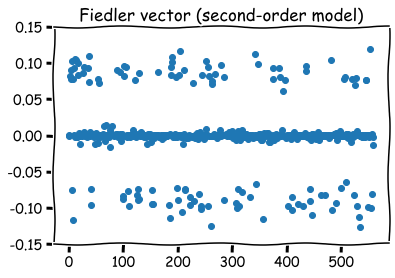

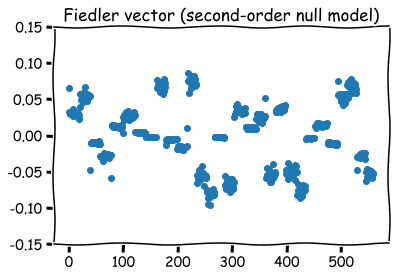

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

plt.ylim(-.15, .15)
plt.title('Fiedler vector (second-order model)')
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(hon_2)))
plt.show()

plt.title('Fiedler vector (second-order null model)')
plt.ylim(-.15, .15)
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(pp.HigherOrderNetwork(p, k=2, null_model=True))))
plt.show()

The three clusters in the temporal network clearly show up as three different value ranges in the distribution of entries in the Fiedler vector. The lack of this structure in the null model confirms, that the cluster structure is only due to the chronological ordering of links, and neither due to their topology nor due their frequencies.